In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

## Simple linear regression

In [2]:
data = np.loadtxt('data/simple_regression.txt')
y_data = data[:, 0]
x_data = data[:, 1]

data[:5]

array([[50.496375,  7.312312],
       [69.017336,  9.94901 ],
       [ 6.504676,  0.402668],
       [47.202416,  7.372892],
       [40.42739 ,  5.413481]])

In [3]:
with tf.Graph().as_default() as simple_regression:
    y = tf.placeholder(dtype=tf.float32, shape=[None])
    
    x = tf.placeholder(dtype=tf.float32, shape=[None])
    W = tf.get_variable('W' ,dtype=tf.float32, initializer=1.)
    b = tf.get_variable('b', dtype=tf.float32, initializer=1.)
    
    h = W*x + b

    cost = tf.reduce_mean(tf.square(tf.subtract(h, y)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train = optimizer.minimize(cost)

In [4]:
with tf.Session(graph=simple_regression) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        l, W_, b_,_ = sess.run([cost, W, b, train], feed_dict={x:x_data, y:y_data})
        if i%2000 == 0 or i>9997:
            print(f"loss : {l:10.4f}  |  varibales : {[W_, b_]}")
        
    print(f'\nfinal W, b (local optima) : {W_:.4f}, {b_:.4f}')

loss :  1090.7887  |  varibales : [1.368382, 1.056958]
loss :     8.9577  |  varibales : [6.9593, 0.43259335]
loss :     8.7629  |  varibales : [7.053416, -0.16414122]
loss :     8.7308  |  varibales : [7.091632, -0.40644208]
loss :     8.7255  |  varibales : [7.107147, -0.5048308]
loss :     8.7246  |  varibales : [7.1134458, -0.5447615]
loss :     8.7246  |  varibales : [7.1134477, -0.54477376]

final W, b (local optima) : 7.1134, -0.5448


In [5]:
with tf.Graph().as_default() as simple_regression2:
    y = tf.placeholder(dtype=tf.float32, shape=[None])
    
    x = tf.placeholder(dtype=tf.float32, shape=[None])
    W = tf.get_variable('W' ,dtype=tf.float32, initializer=1.)
    b = tf.get_variable('b', dtype=tf.float32, initializer=1.)
    
    h = W*x + b
    
    cost = tf.reduce_mean(tf.square(tf.subtract(h, y)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train = optimizer.minimize(cost)

In [6]:
with tf.Session(graph=simple_regression2) as sess2:
    sess2.run(tf.global_variables_initializer())
    for i in range(10000):
        l, W_, b_,_ = sess2.run([cost, W, b, train], feed_dict={x:x_data, y:y_data})
        if i%2000 == 0 or i>9997:
            print(f"loss : {l:10.4f}  |  varibales : {[W_, b_]}")
        
    print(f'\nfinal W, b (local optima) : {W_:.4f}, {b_:.4f}')

loss :  1090.7887  |  varibales : [4.683819, 1.5695798]
loss :     8.7245  |  varibales : [7.1177173, -0.57182765]
loss :     8.7245  |  varibales : [7.117762, -0.5721127]
loss :     8.7245  |  varibales : [7.117762, -0.5721127]
loss :     8.7245  |  varibales : [7.117762, -0.5721127]
loss :     8.7245  |  varibales : [7.117762, -0.5721127]
loss :     8.7245  |  varibales : [7.117762, -0.5721127]

final W, b (local optima) : 7.1178, -0.5721


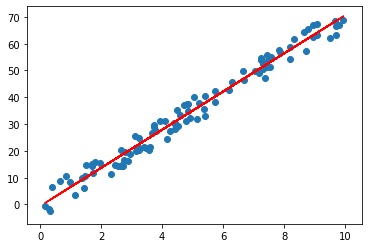

In [7]:
plt.plot(x_data, W_*x_data + b_, 'r')
plt.scatter(x_data, y_data)
plt.show()

## Multiple linear regression

In [8]:
data2 = np.loadtxt('data/multi_regression.txt')
x_data = data2[:, :2]
y_data = data2[:, 2]

data2

array([[1., 0., 1.],
       [0., 2., 2.],
       [3., 0., 3.],
       [0., 4., 4.],
       [5., 0., 5.]])

In [9]:
with tf.Graph().as_default() as multiple_regression:
    y = tf.placeholder(dtype=tf.float32, shape=[None])
    
    x = tf.placeholder(dtype=tf.float32, shape=[None, 2])
    W = tf.get_variable('W' , shape=[1, 2], dtype=tf.float32)
    b = tf.get_variable('b', dtype=tf.float32, initializer=1.)
    
    h = tf.matmul(W, x, transpose_b=True) + b
    
    cost = tf.reduce_mean(tf.square(tf.subtract(h, y)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train = optimizer.minimize(cost)

In [10]:
with tf.Session(graph=multiple_regression) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        l, W_, b_, _ = sess.run([cost, W, b, train], feed_dict={x:x_data, y:y_data})
        if i%2000 == 0 or i>9997:
            print(f"loss : {l:10.4f}  |  weights : {str(W_[0]):30}  |  bias : {b_:6.4f}")
        
    print()
    print(f'final W (local optima) : {W_[0][0]:.4f}, {W_[0][1]:.4f}')
    print(f'final b (local optima) : {b_:.4f}')

loss :    15.7377  |  weights : [-0.7235229  0.8386913]         |  bias : 1.0047
loss :     0.0878  |  weights : [0.8153885  0.78095984]         |  bias : 0.7023
loss :     0.0259  |  weights : [0.89972323 0.8810224 ]         |  bias : 0.3815
loss :     0.0076  |  weights : [0.94553167 0.93537384]         |  bias : 0.2072
loss :     0.0023  |  weights : [0.9704139 0.9648963]           |  bias : 0.1125
loss :     0.0007  |  weights : [0.98391926 0.9809204 ]         |  bias : 0.0612
loss :     0.0007  |  weights : [0.98392415 0.9809262 ]         |  bias : 0.0612

final W (local optima) : 0.9839, 0.9809
final b (local optima) : 0.0612


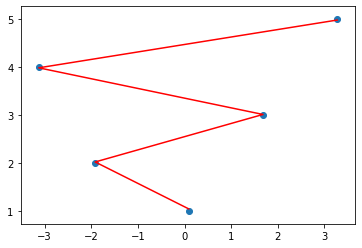

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
new_x_data = pca.fit_transform(x_data)
pred = np.matmul(W_, x_data.T)+b_

plt.plot(new_x_data, pred[0], 'r')
plt.scatter(new_x_data, y_data)
plt.show()

## Logistic Regression

In [12]:
data3 = np.loadtxt('data/logistic_regression.txt')
x_data = data3[:, :-1]
y_data = data3[:, -1]

data3

array([[1., 2., 1., 0.],
       [1., 3., 2., 0.],
       [1., 3., 4., 0.],
       [1., 5., 5., 1.],
       [1., 7., 5., 1.],
       [1., 2., 5., 1.]])

In [13]:
num_features = x_data.shape[1]

with tf.Graph().as_default() as logistic_regression:
    y_lab = tf.placeholder(dtype=tf.float32, shape=[None])
    
    x = tf.placeholder(dtype=tf.float32, shape=[None, num_features])
    w = tf.get_variable('w', [1, num_features], dtype=tf.float32)
    b = tf.get_variable('b', dtype=tf.float32, initializer=1.)
    
    h1 = tf.matmul(w, x, transpose_b=True) + b
    h2 = tf.sigmoid(h1)
    
    cost = -tf.reduce_mean( y_lab * tf.log(h2) + (1-y_lab) * tf.log(1-h2) )
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train = optimizer.minimize(cost)

In [14]:
with tf.Session(graph=logistic_regression) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        l, w_, b_, _ = sess.run( [cost, w, b, train], feed_dict={x:x_data, y_lab:y_data} )
        if i%2000 == 0 or i>9997:
            print(f"loss : {l:10.4f}  |  weights : {str(w_[0]):40}  |  bias : {b_:6.4f}")
        
print()
print(f'final W (local optima) : {w_[0][0]:.4f}, {w_[0][1]:.4f}, {w_[0][2]:.4f}')
print(f'final b (local optima) : {b_:.4f}')

loss :     1.3016  |  weights : [ 1.148437    0.31998453 -0.2783422 ]     |  bias : 0.9959
loss :     0.3685  |  weights : [-1.1657586   0.01842521  0.7314924 ]     |  bias : -1.3183
loss :     0.2703  |  weights : [-2.1112995  0.1410903  1.0551624]        |  bias : -2.2638
loss :     0.2300  |  weights : [-2.7206578   0.19257724  1.2850049 ]     |  bias : -2.8732
loss :     0.2060  |  weights : [-3.191697    0.21905576  1.4722387 ]     |  bias : -3.3442
loss :     0.1889  |  weights : [-3.587714    0.23418719  1.6346122 ]     |  bias : -3.7402
loss :     0.1889  |  weights : [-3.587899    0.23419297  1.6346889 ]     |  bias : -3.7404

final W (local optima) : -3.5879, 0.2342, 1.6347
final b (local optima) : -3.7404


In [15]:
for j in range(len(x_data)):
    sum_ = 0
    for i in range(3):
        sum_ += w_[0][i] * x_data[j,i]
    print('label', y_data[j], 'probability', 1/(1+math.exp(-(sum_+b_))))

label 0.0 probability 0.005350400950236972
label 0.0 probability 0.03368825661384812
label 0.0 probability 0.4782738189919995
label 1.0 probability 0.8824787258259169
label 1.0 probability 0.9230481318325542
label 1.0 probability 0.7881043228009131
